In [1]:
# Approach to generate the linear trajectory to every trajectory recived from fiji to then compre
# them by some metrics:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
# Creating the sample data frame randomly generated
df_random = pd.DataFrame(columns=['Track_name','start_x', 'start_y', 'end_x', 'end_y', 'Move_frames'])

In [3]:
# Generating 10 random positions for start and end points:
track_names = [f'track_{i}' for i in range(1,21)]
df_random['Track_name'] = track_names
df_random['Move_frames'] = random.sample(range(5,100), 20)

col_list = ['start_x', 'start_y', 'end_x', 'end_y']
for col in col_list:
    df_random[col] = random.sample(range(0,40), 20)
    
df_random

,Track_name,start_x,start_y,end_x,end_y,Move_frames
0,track_1,26,7,1,29,53
1,track_2,32,11,32,24,56
2,track_3,38,9,9,35,30
3,track_4,28,32,2,25,66
4,track_5,10,0,38,3,93
5,track_6,6,18,37,37,29
6,track_7,12,12,17,10,26
7,track_8,20,20,20,33,90
8,track_9,39,5,19,21,6
9,track_10,5,30,15,0,58


In [4]:
# function to generating random intigers for the pos_x and y in every move frame

def generate_random_integers(n):
    return np.random.randint(1, 50, size = (n, 2))

# creating a new data frame with equal number of rows based on the 'number' column
df_move_frames = pd.DataFrame(np.repeat(df_random.values, df_random['Move_frames'], axis = 0),
                              columns=df_random.columns)

track_names = ['track_1', 'track_2', 'track_3', 'track_4', 'track_5', 'track_6', 'track_7', 'track_8',
               'track_9', 'track_10', 'track_11', 'track_12', 'track_13', 'track_14', 'track_15', 'track_16',
               'track_17', 'track_18', 'track_19', 'track_20',]

# Initiating the rows with the nan pos_x and pos_y columns:
df_move_frames['pos_x'] = pd.Series([float('nan')] *len(df_move_frames))
df_move_frames['pos_y'] = pd.Series([float('nan')] *len(df_move_frames))

for name in track_names:
    counter = 0
    for index, row in df_move_frames[df_move_frames['Track_name'] == name].iterrows():
        if row[0] == str(name):
            if counter == 0:
                df_move_frames.loc[index, 'pos_x'] = row['start_x']
                df_move_frames.loc[index, 'pos_y']= row['start_y']
            elif counter == (row['Move_frames'] - 1):
                df_move_frames.loc[index, 'pos_x'] = row['end_x']
                df_move_frames.loc[index, 'pos_y'] = row['end_y']
            else:
                df_move_frames.loc[index, 'pos_x'] = random.randint(1, 100)
                df_move_frames.loc[index, 'pos_y']= random.randint(1, 100)
            counter += 1

df_move_frames.to_csv('df_example_generated.csv')


In [5]:
df_move_frames

,Track_name,start_x,start_y,end_x,end_y,Move_frames,pos_x,pos_y
0,track_1,26,7,1,29,53,26.0,7.0
1,track_1,26,7,1,29,53,81.0,83.0
2,track_1,26,7,1,29,53,3.0,62.0
3,track_1,26,7,1,29,53,10.0,33.0
4,track_1,26,7,1,29,53,82.0,97.0
...,...,...,...,...,...,...,...,...
982,track_20,11,1,13,6,50,51.0,67.0
983,track_20,11,1,13,6,50,5.0,13.0
984,track_20,11,1,13,6,50,36.0,99.0
985,track_20,11,1,13,6,50,94.0,6.0


In [6]:
# Generating straight line points throught the Bresenham's algorithm

def get_intermidiate_points(A, B, steps):
    x1, y1 = A
    x2, y2 = B
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    # Saving points in line as the list of tuples:
    points = [(x1, y1)]
    
    # Itearting to the end point:
    for i in range(steps-1):
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
        points.append((x1, y1))
        
    return points

In [7]:
# Also lets add straight amtmematical approach to getting sample from line:
# where we give th coordinates, and number of samples we get so if the movement was
# 40 frames we get 40 samples becasue we know the start and end points we need 38 more beetwen knowns
# points
def get_points_on_line(x_A, y_A, x_B, y_B, n_samples):
    # Calcualting distance between those points:
    distance = math.sqrt((x_B - x_A)**2 + (y_B - y_A)**2)
    
    # Returning the starting points if the program end up getting the same set of points as
    # start and end positions:
    if distance == 0:
        return [(x_A, y_A)]
    
    #step = (x_B - x_A) / (n_samples-1)
    
    # Calcualting the slope of the line and the b y-intercept
    m = (y_B - y_A) / (x_B - x_A)
    b = y_A - m * x_A
    
    # Create the list of x values with n_samples elements:
    x_values = [x_A + (x_B - x_A) * i/(n_samples - 1) for i in range(n_samples)]
    
    # Calculating coresponding y values for each x value:
    points = [(x, m*x + b) for x in x_values]
    
    # Checking if the last point is already in the list (due to rounding errors)
    if points[-1] != (x_B, y_B):
        points.append((x_B, y_B))
    
    # Setting the points list:
    #points = []
    
    #x = x_A
    
    #while x < x_B - step/2:
    #    y = m * x + b
    #    points.append((x, y))
    #    x += step
        
    return points

In [16]:
# Added third version of generating the points in line but covering also the vertical lines which
# can be generated randomly:

def generating_points_in_line_mark_2(x_A, y_A, x_B, y_B, n_samples):
    if x_A == x_B: # vertical line
        y_values = [y_A + i*(y_B-y_A)/(n_samples-1) for i in range(n_samples)]
        x_values = [x_A] * n_samples
    else: # non-vertical line
        x_values = [x_A + i*(x_B-x_A)/(n_samples-1) for i in range(n_samples)]
        y_values = [y_A + i*(y_B-y_A)/(n_samples-1) for i in range(n_samples)]

    # make sure first and last points are (x_A, y_A) and (x_B, y_B) respectively
    x_values[0] = x_A
    y_values[0] = y_A
    x_values[-1] = x_B
    y_values[-1] = y_B

    # create a list of tuples representing the generated points
    points = [(x_values[i], y_values[i]) for i in range(n_samples)]

    return points

In [18]:
# From the Bersenham's algorithm:
random_points = get_intermidiate_points((0,0), (0,150), 170)
#random_points

# From the straight amthematical approach:
random_points_math = generating_points_in_line_mark_2(0,0, 0,150, 170)
#random_points_math

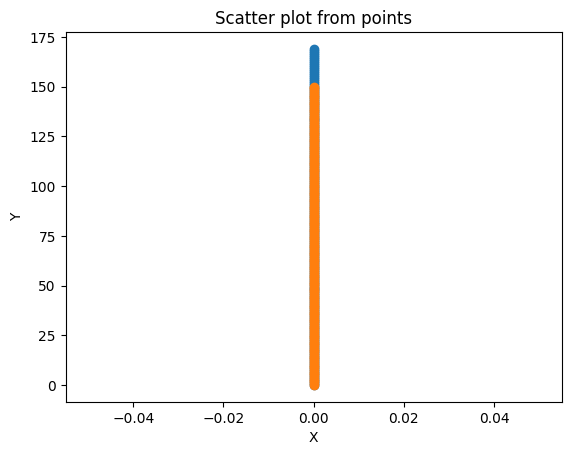

In [19]:
# Chcecking the performance of the algorithm:

# Unpacking the tuples into the separete x and y:
# first list:
x_values, y_values = zip(*random_points)
# second list:
x_2, y_2 = zip(*random_points_math)

# Creating scatterplot:
plt.scatter(x_values, y_values, label = 'Algoritm')
plt.scatter(x_2, y_2, label = 'Math_approach')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()

In [10]:
# Getting the number of tracks and position of start and end:

def get_unique_starting_pos(df):
    
    grouped = df.groupby('Track_name')
    
    # For storing name and the unique starting postions
    track_dict = {}
    # Iterate throught each group:
    for name, group in grouped:
        move_frames = int(group[['Move_frames']].drop_duplicates().values[0])
        start_cords = tuple(group[['start_x','start_y']].drop_duplicates().values[0])
        end_cords = tuple(group[['end_x','end_y']].drop_duplicates().values[0])
        
        track_dict[name] = (start_cords, end_cords, move_frames)

    return track_dict

In [11]:
track_dict = get_unique_starting_pos(df_move_frames)
track_dict

{'track_1': ((26, 7), (1, 29), 53),
 'track_10': ((5, 30), (15, 0), 58),
 'track_11': ((13, 25), (26, 19), 10),
 'track_12': ((7, 31), (29, 38), 67),
 'track_13': ((21, 22), (21, 28), 79),
 'track_14': ((24, 39), (6, 18), 84),
 'track_15': ((34, 21), (14, 4), 8),
 'track_16': ((17, 17), (35, 23), 47),
 'track_17': ((0, 27), (5, 26), 9),
 'track_18': ((15, 26), (7, 31), 86),
 'track_19': ((37, 10), (3, 27), 40),
 'track_2': ((32, 11), (32, 24), 56),
 'track_20': ((11, 1), (13, 6), 50),
 'track_3': ((38, 9), (9, 35), 30),
 'track_4': ((28, 32), (2, 25), 66),
 'track_5': ((10, 0), (38, 3), 93),
 'track_6': ((6, 18), (37, 37), 29),
 'track_7': ((12, 12), (17, 10), 26),
 'track_8': ((20, 20), (20, 33), 90),
 'track_9': ((39, 5), (19, 21), 6)}

In [20]:
def generate_straight_line_positions(track_dict):
    
    # Setting the dictionary to store output values of position and the name of a track:
    track_in_line_pos_dict = {}
    
    # Iterate throught the data frame to go throught all tracks:
    for name in track_dict.keys():
        # setting the name variable:
            # Setting the casting to str becasue it will be used furhter as this type:
        track_id = str(name)
        # spliting the data from tuple to two varibales:
        start_coords, end_coords, move_frames = track_dict[track_id]
        
        # setting the star positions variable:
        start_x, start_y = start_coords
        
        # Setting the end positions:
        end_x, end_y = end_coords
        
        # Generating the points in line to return each position:
        tracks_move_in_line_pos = generating_points_in_line_mark_2(start_x, start_y, end_x, end_y, move_frames)
        
        # Adding all things to dict with the name of track and the list of positions:
        track_in_line_pos_dict[name] = tracks_move_in_line_pos
        
    return track_in_line_pos_dict        

In [21]:
# Checking the performance of function generating points in line:
track_in_line_pos_generated = generate_straight_line_positions(track_dict)
track_in_line_pos_generated

{'track_1': [(26, 7),
  (25.51923076923077, 7.423076923076923),
  (25.03846153846154, 7.846153846153846),
  (24.557692307692307, 8.26923076923077),
  (24.076923076923077, 8.692307692307692),
  (23.596153846153847, 9.115384615384615),
  (23.115384615384617, 9.538461538461538),
  (22.634615384615383, 9.961538461538462),
  (22.153846153846153, 10.384615384615385),
  (21.673076923076923, 10.807692307692307),
  (21.192307692307693, 11.23076923076923),
  (20.71153846153846, 11.653846153846153),
  (20.23076923076923, 12.076923076923077),
  (19.75, 12.5),
  (19.26923076923077, 12.923076923076923),
  (18.78846153846154, 13.346153846153847),
  (18.307692307692307, 13.76923076923077),
  (17.826923076923077, 14.192307692307693),
  (17.346153846153847, 14.615384615384615),
  (16.865384615384613, 15.038461538461538),
  (16.384615384615387, 15.461538461538462),
  (15.903846153846153, 15.884615384615385),
  (15.423076923076923, 16.307692307692307),
  (14.942307692307692, 16.73076923076923),
  (14.4615

In [22]:
check_list = generating_points_in_line_mark_2(20, 20, 20, 33, 90)
#check_list

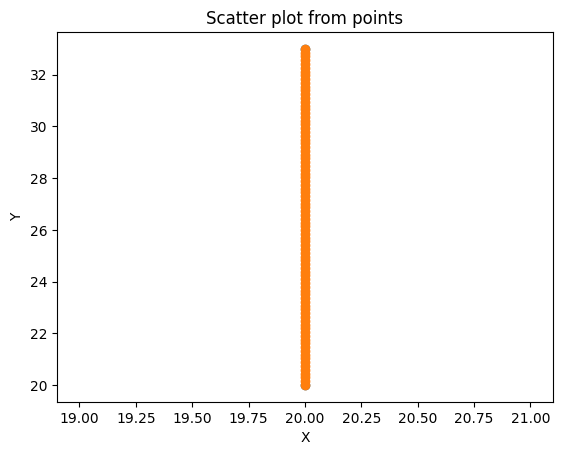

In [23]:
# Chcecking the performance of the algorithm:

checking_starting_points = [(20,20), (20,33)]
# Unpacking the tuples into the separete x and y:
# first list:
x_values, y_values = zip(*checking_starting_points)
# second list:
x_2, y_2 = zip(*check_list)

# Creating scatterplot:
plt.scatter(x_values, y_values, label = 'Algoritm')
plt.scatter(x_2, y_2, label = 'Math_approach')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()

In [ ]:
# Making function to extracts the name and the coordinates as tuple:

def make_track_coords_dict(df):
    grouped = df.groupby('Track_name')
    
    # creating the dictionary with the track name and all its pos_x, pos_y as tuples:
    result_dict = {name: list(zip(group['pos_x'], group['pos_y'])) for name, group in grouped}
    
    return result_dict


In [ ]:
# Generating the dictionary of the coordianates for the each track movement:
track_coords_dict = make_track_coords_dict(df_move_frames)
# track_coords_dict

In [ ]:
# How to compare the two trajectories?
# Possible metrics to use:
''' 
    Euclidean distance: This is simply the distance between the two trajectories at each time point.
    You can calculate the average or maximum distance over all time points.

    Dynamic Time Warping (DTW): DTW is a method to align two time series with similar shapes but different lengths.
    It measures the similarity between two trajectories by finding a path that minimizes the distance between corresponding points along the two trajectories.

    Fréchet distance: The Fréchet distance measures the similarity between two curves by finding the minimum leash length needed for a dog to walk along the two curves.
    It is a distance metric that is symmetric and satisfies the triangle inequality.

    Hausdorff distance: The Hausdorff distance measures the maximum distance between any point on one trajectory and the closest point on the other trajectory.
    It can be used to measure the similarity between two sets of points, where each set represents a trajectory.

    Cosine similarity: This measures the cosine of the angle between two trajectories.
    It ranges from -1 to 1, where 1 indicates identical trajectories and -1 indicates completely dissimilar trajectories.
    
    
'''